In [ ]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial import distance

# A0. Data Preprocessing
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df = df.dropna(subset=['price'])  # drop missing price rows
    df['availability_class'] = df['availability_365'].apply(lambda x: 1 if x == 365 else 0)
    feature_cols = ['latitude', 'longitude', 'price', 'minimum_nights',
                    'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'number_of_reviews_ltm']
    df = df.dropna(subset=feature_cols)  # drop rows with missing features
    X = df[feature_cols].values
    y = df['availability_class'].values
    return X, y, df


# A1. Intraclass Spread and Interclass Distance
def class_stats(X, y):
    class_0 = X[y == 0]
    class_1 = X[y == 1]
    mean_0 = np.mean(class_0, axis=0)
    mean_1 = np.mean(class_1, axis=0)
    std_0 = np.std(class_0, axis=0)
    std_1 = np.std(class_1, axis=0)
    interclass_dist = np.linalg.norm(mean_0 - mean_1)
    return mean_0, mean_1, std_0, std_1, interclass_dist

# A2. Histogram and statistics of a feature
def feature_histogram(X, feature_index):
    feature_data = X[:, feature_index]
    mean_val = np.mean(feature_data)
    var_val = np.var(feature_data)
    plt.hist(feature_data, bins=20, edgecolor='black')
    plt.title(f"Histogram of Feature Index {feature_index}")
    plt.xlabel("Feature Value")
    plt.ylabel("Frequency")
    plt.show()
    return mean_val, var_val

# A3. Minkowski Distance plot
def minkowski_plot(vec1, vec2):
    r_values = range(1, 11)
    distances = [distance.minkowski(vec1, vec2, p=r) for r in r_values]
    plt.plot(r_values, distances, marker='o')
    plt.title("Minkowski Distance vs r")
    plt.xlabel("r")
    plt.ylabel("Distance")
    plt.grid(True)
    plt.show()
    return distances

# A4. Train-test split
def split_dataset(X, y):
    return train_test_split(X, y, test_size=0.3, random_state=42)

# A5. Train kNN Classifier
def train_knn(X_train, y_train, k=3):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model

# A6. Test Accuracy
def evaluate_accuracy(model, X_test, y_test):
    return model.score(X_test, y_test)

# A7. Predict classes
def predict_classes(model, X_test):
    return model.predict(X_test)

# A8. Accuracy vs k plot
def accuracy_vs_k(X_train, X_test, y_train, y_test):
    k_range = range(1, 12)
    accuracies = []
    for k in k_range:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        acc = model.score(X_test, y_test)
        accuracies.append(acc)
    plt.plot(k_range, accuracies, marker='o')
    plt.title("Accuracy vs k")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.show()
    return accuracies

# A9. Confusion Matrix & Metrics
def evaluate_confusion_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    report_train = classification_report(y_train, y_train_pred, output_dict=True)
    report_test = classification_report(y_test, y_test_pred, output_dict=True)
    return cm_train, cm_test, report_train, report_test

Class 0 Mean Vector: [ 40.72610487 -73.94249025 241.67637122  24.31471497  51.52900582
   1.17305154  30.0636906    9.53676946]
Class 1 Mean Vector: [ 40.72050863 -73.91867195 222.28148148  40.02880658  37.81646091
   0.69023045  27.59506173   1.54485597]
Class 0 Std Dev Vector: [5.98823423e-02 6.13870140e-02 1.39129313e+03 2.54218243e+01
 9.31978979e+01 2.26498495e+00 1.14922349e+02 3.02022452e+01]
Class 1 Std Dev Vector: [7.21947076e-02 7.44335090e-02 3.83025345e+02 7.56691085e+01
 8.19581549e+01 1.79309066e+00 1.11761647e+02 1.84160716e+01]
Interclass Distance: 29.687149337717365


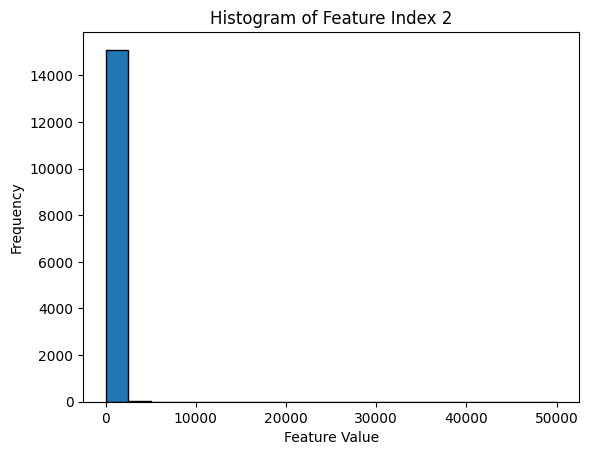

Mean of feature: 240.11847150601614
Variance of feature: 1792023.398102543


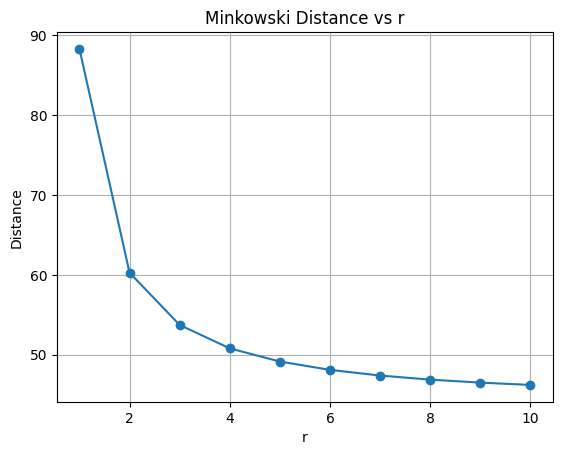

Minkowski Distances (r=1 to 10): [np.float64(88.30148), 60.28303490118095, np.float64(53.734407690402485), np.float64(50.801912970276746), np.float64(49.153528317669334), np.float64(48.110025118978086), np.float64(47.39902890017545), np.float64(46.88990773259232), np.float64(46.51217029758407), np.float64(46.22442314169048)]
Test Accuracy (k=3): 0.8962097840458352
Predictions for test data (first 10): [0 0 0 0 0 0 0 0 0 0]


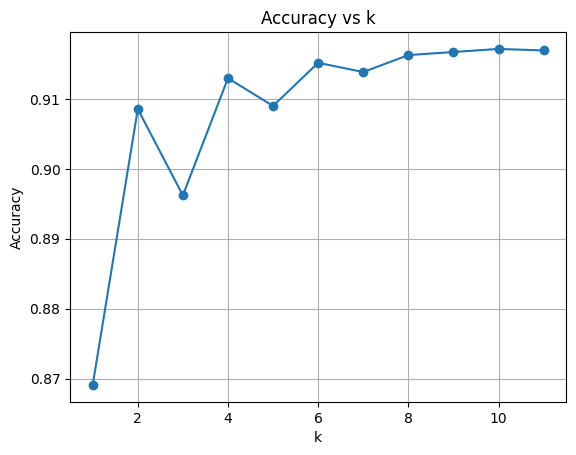

Accuracy for k=1 to 11: [0.869105332745703, 0.9085500220361392, 0.8962097840458352, 0.9129572498898193, 0.9089907448215073, 0.9151608638166593, 0.9138386954605553, 0.9162626707800793, 0.9167033935654474, 0.9171441163508154, 0.9169237549581314]
Train Confusion Matrix:
 [[9648  102]
 [ 555  283]]
Test Confusion Matrix:
 [[4037  124]
 [ 347   30]]
Train Classification Report:
               precision    recall  f1-score       support
0              0.945604  0.989538  0.967073   9750.000000
1              0.735065  0.337709  0.462796    838.000000
accuracy       0.937949  0.937949  0.937949      0.937949
macro avg      0.840335  0.663624  0.714935  10588.000000
weighted avg   0.928941  0.937949  0.927161  10588.000000
Test Classification Report:
               precision    recall  f1-score     support
0              0.920849  0.970199  0.944880  4161.00000
1              0.194805  0.079576  0.112994   377.00000
accuracy       0.896210  0.896210  0.896210     0.89621
macro avg      0.55782

In [ ]:

# A0. Load and preprocess data
X, y, df_cleaned = preprocess_data("listings.csv")

# A1. Intraclass spread and interclass distance
mean_0, mean_1, std_0, std_1, inter_dist = class_stats(X, y)
print("Class 0 Mean Vector:", mean_0)
print("Class 1 Mean Vector:", mean_1)
print("Class 0 Std Dev Vector:", std_0)
print("Class 1 Std Dev Vector:", std_1)
print("Interclass Distance:", inter_dist)

# A2. Histogram of a feature (example: price → index 2)
mean_val, var_val = feature_histogram(X, feature_index=2)
print("Mean of feature:", mean_val)
print("Variance of feature:", var_val)

# A3. Minkowski Distance between two vectors
vec1, vec2 = X[0], X[1]
minkowski_distances = minkowski_plot(vec1, vec2)
print("Minkowski Distances (r=1 to 10):", minkowski_distances)

# A4. Train-test split
X_train, X_test, y_train, y_test = split_dataset(X, y)

# A5. Train kNN (k=3)
knn_model = train_knn(X_train, y_train, k=3)

# A6. Accuracy
test_accuracy = evaluate_accuracy(knn_model, X_test, y_test)
print("Test Accuracy (k=3):", test_accuracy)

# A7. Predictions
predicted_classes = predict_classes(knn_model, X_test)
print("Predictions for test data (first 10):", predicted_classes[:10])

# A8. Accuracy vs k
k_accuracies = accuracy_vs_k(X_train, X_test, y_train, y_test)
print("Accuracy for k=1 to 11:", k_accuracies)

# A9. Confusion Matrix & Classification Metrics
cm_train, cm_test, report_train, report_test = evaluate_confusion_metrics(
    knn_model, X_train, y_train, X_test, y_test
)

print("Train Confusion Matrix:\n", cm_train)
print("Test Confusion Matrix:\n", cm_test)
print("Train Classification Report:\n", pd.DataFrame(report_train).transpose())
print("Test Classification Report:\n", pd.DataFrame(report_test).transpose())
